In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/data_initial_preprocessing.csv')
df.shape

(843915, 12)

In [3]:
df

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860
...,...,...,...,...,...,...,...,...,...,...,...,...
843910,SN61580,62.2943,8.1255,2019,5,13,18,2.25586,5.17270,5.8,0,0.62730
843911,SN24670,60.2684,9.6919,2019,5,13,18,9.25342,11.92026,11.0,0,0.92026
843912,SN90490,69.6767,18.9133,2019,5,13,18,3.75146,3.25000,3.1,0,0.15000
843913,SN77490,65.3143,13.4483,2019,5,13,18,-0.56055,-2.15744,-2.6,0,0.44256


In [4]:
df[df.gridpp_error > 3]

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
19,SN76957,60.7735,3.5010,2019,5,13,12,6.52588,6.48862,10.8,0,4.31138
73,SN62295,62.7560,7.2088,2019,5,13,12,8.61670,8.89587,5.7,0,3.19587
142,SN50505,60.3452,5.3713,2019,5,13,12,10.31592,10.68980,7.5,0,3.18980
334,SN52555,60.7928,5.0218,2019,5,13,12,10.64404,11.35538,8.0,0,3.35538
364,SN90,61.1185,12.0647,2019,5,13,12,6.89502,6.81122,1.9,0,4.91122
...,...,...,...,...,...,...,...,...,...,...,...,...
843645,SN90,61.1185,12.0647,2019,5,13,18,6.26220,7.41064,3.4,0,4.01064
843709,SN34095,58.9817,9.6068,2019,5,13,18,10.48828,11.61120,8.0,0,3.61120
843763,SN11440,60.5878,11.1470,2019,5,13,18,8.68700,10.13577,7.0,0,3.13577
843831,SN17895,59.7940,10.7600,2019,5,13,18,12.37012,13.36237,10.0,0,3.36237


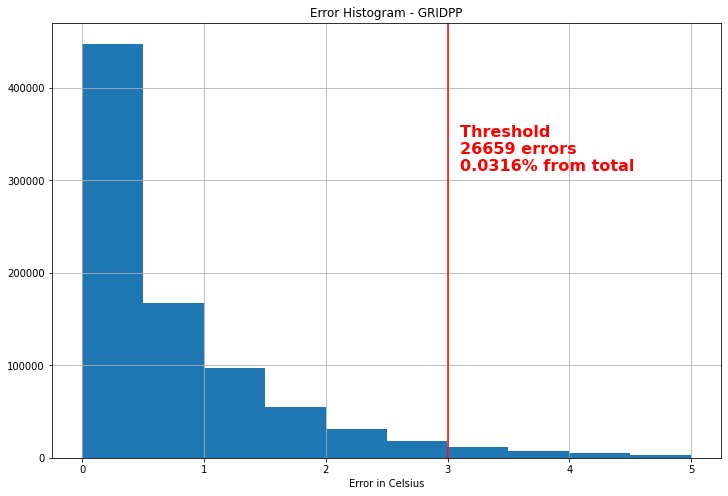

In [5]:
font = {
    'color': 'red',
    'weight': 'bold',
    'size': 16,
}

gt3qty = df[df.gridpp_error > 3].shape[0]
gt3p = gt3qty/df.shape[0]

plt.figure(figsize=(12,8))
plt.hist(df.gridpp_error)
plt.axvline(3, color='red')
plt.grid()
plt.title('Error Histogram - GRIDPP')
plt.xlabel('Error in Celsius')
plt.text(3.1, 310000, f'Threshold \n{gt3qty} errors\n{round(gt3p,4)}% from total', fontdict=font)
plt.show()

In [6]:
!ls

EDA.ipynb				 models.py
graphs					 non_gnn_fig
meps_forecast_histogram_no_outlier.png	 __pycache__
meps_forecast_histogram_outlier.png	 runs
met_no_2019_torch-CNN-Clever-mod1.ipynb  training.ipynb
met_no_2019_torch-MLP-Clever-mod1.ipynb  train_utils.py


In [7]:
mlp = pd.read_csv('../data/predict/prediction_mlp_to_look.csv')

In [8]:
mlp['error'] = np.sqrt((mlp['prediction'] - mlp['label'])**2)
mlp['gridpp_error'] = np.sqrt((mlp['label'] - mlp['gridpp'])**2)

In [9]:
cnn = pd.read_csv('../data/predict/prediction_cnn_to_look.csv')

In [10]:
cnn

,lat,long,month,day,hour,forecast,gridpp,label,prediction
0,59.2173,10.4103,9,18,12,15.777100,15.35254,16.0,15.221878
1,59.7310,10.2142,7,16,12,21.154300,21.37570,21.5,20.535875
2,62.2943,8.1255,1,31,0,-6.549620,-4.38705,-4.2,-3.922813
3,59.5310,10.2643,4,7,6,1.531000,1.50204,4.3,1.455682
4,61.5832,5.0278,2,20,0,4.130600,4.55000,4.4,4.182861
...,...,...,...,...,...,...,...,...,...
84386,60.8548,8.5930,1,23,0,-9.725520,-9.36844,-10.6,-9.701574
84387,69.6767,18.9133,6,4,6,10.546880,8.75000,8.6,8.418113
84388,60.5878,11.1470,10,5,18,3.680908,1.71164,0.4,0.788092
84389,60.8935,7.0557,3,26,6,-4.182740,-0.81143,-0.4,-0.594537


In [11]:
cnn['error'] = np.sqrt((cnn['prediction'] - cnn['label'])**2)

In [12]:
cnn['gridpp_error'] = np.sqrt((cnn['label'] - cnn['gridpp'])**2)

In [13]:
def plot_error_hist(df, column, title):
    font = {
        'color': 'red',
        'weight': 'bold',
        'size': 16,
    }

    gt3qty = df[df[column] > 3].shape[0]
    gt3p = gt3qty/df.shape[0]

    plt.figure(figsize=(12,8))
    plt.hist(df[column])
    plt.axvline(3, color='red')
    plt.grid()
    plt.title(f'Error Histogram - {title}')
    plt.xlabel('Error in Celsius')
    plt.text(3.1, 31000, f'Threshold \n{gt3qty} errors\n{round(gt3p,4)}% from total', fontdict=font)
    plt.show()

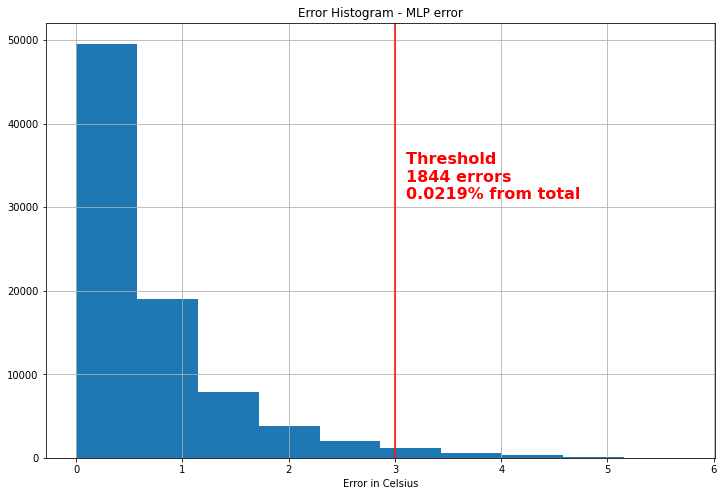

In [14]:
plot_error_hist(mlp, 'error', 'MLP error')

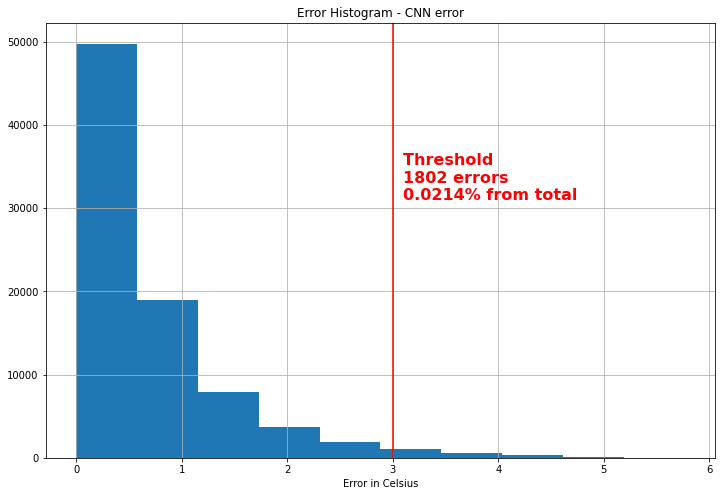

In [15]:
plot_error_hist(cnn, 'error', 'CNN error')

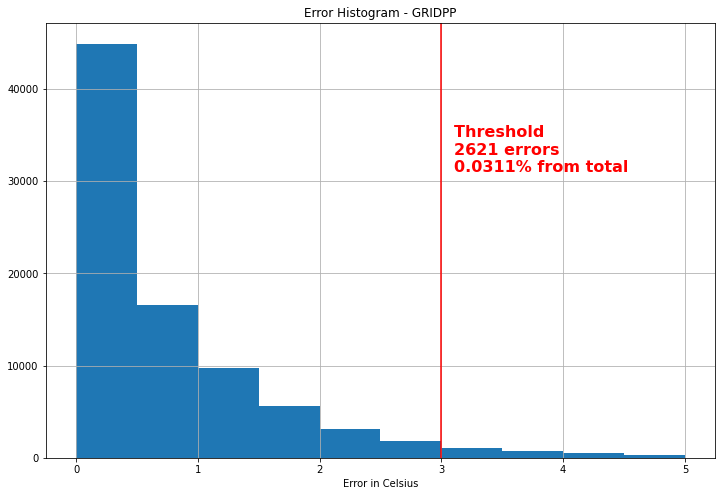

In [16]:
plot_error_hist(cnn, 'gridpp_error', 'GRIDPP')

In [31]:
sns.set(font_scale = 1.7)

In [17]:
def rmse_gt_3(dataframe, error_column, pred):
    # Filtro
    dataframe = dataframe[dataframe['gridpp_error'] > 3]
    rmse = np.sqrt(mean_squared_error(dataframe['label'], dataframe[pred]))

    # Plot
    font = {
        'color': 'red',
        'weight': 'bold',
        'size': 16,
    }

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(12,8))

    sns.boxplot(x = dataframe[error_column], ax=ax_box)
    h = sns.histplot(data = dataframe,x = error_column, ax=ax_hist)
    # ax_hist.text(np.histogram(dataframe[error_column])[1].max()*0.9, np.histogram(dataframe[error_column])[0].mean(), f'RMSE \n{round(rmse, 4)}' , fontdict=font)

    plt.show()

    print(dataframe.shape[0])



In [18]:
def rmse_gt_3_X(dataframe, error_column, pred):
    # Filtro
    dataframe = dataframe[dataframe['gridpp_error'] > 3]
    if error_column != 'gridpp_error':
        dataframe = dataframe[dataframe['gridpp_error'] > dataframe[error_column]]

    rmse = np.sqrt(mean_squared_error(dataframe['label'], dataframe[pred]))

    # Plot
    font = {
        'color': 'red',
        'weight': 'bold',
        'size': 16,
    }

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(12,8))
    sns.boxplot(x = dataframe[error_column], ax=ax_box)
    h = sns.histplot(data = dataframe,x = error_column, ax=ax_hist)
    # ax_hist.text(np.histogram(dataframe[error_column])[1].max()*0.9, np.histogram(dataframe[error_column])[0].mean(), f'RMSE \n{round(rmse, 4)}' , fontdict=font)

    plt.show()

    print(dataframe.shape[0])

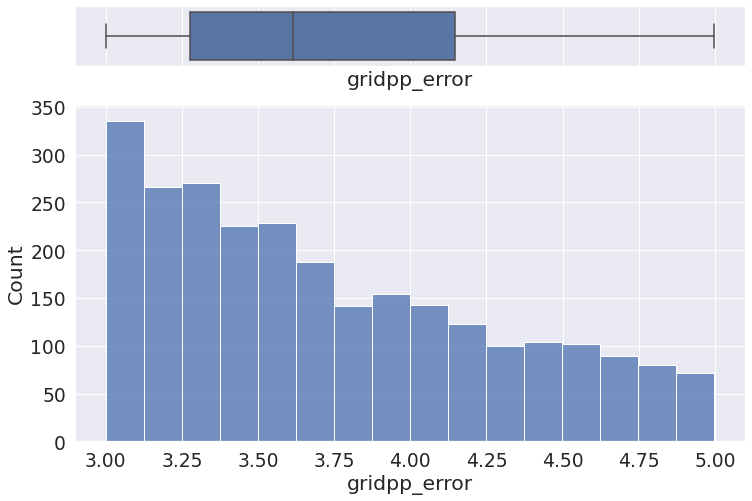

2621


In [32]:
rmse_gt_3(cnn, 'gridpp_error', 'gridpp')

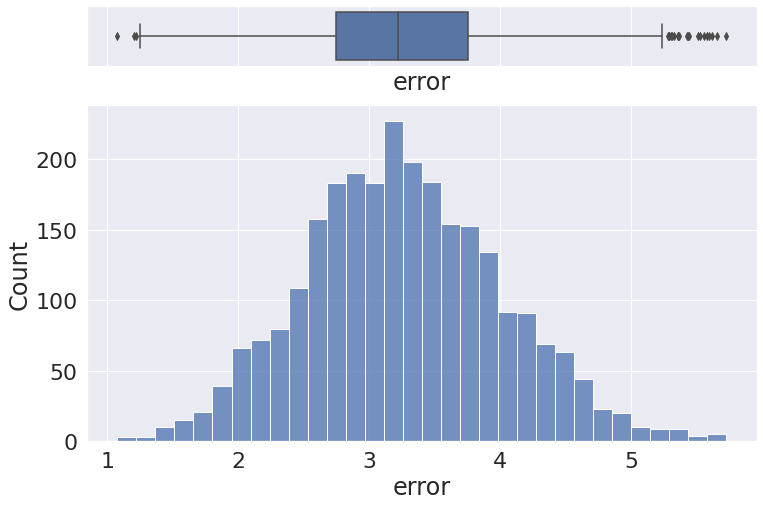

2621


In [22]:
rmse_gt_3(mlp, 'error', 'prediction')

In [29]:
# sns.set(rc={'figure.figsize':(3.5,8.27)})

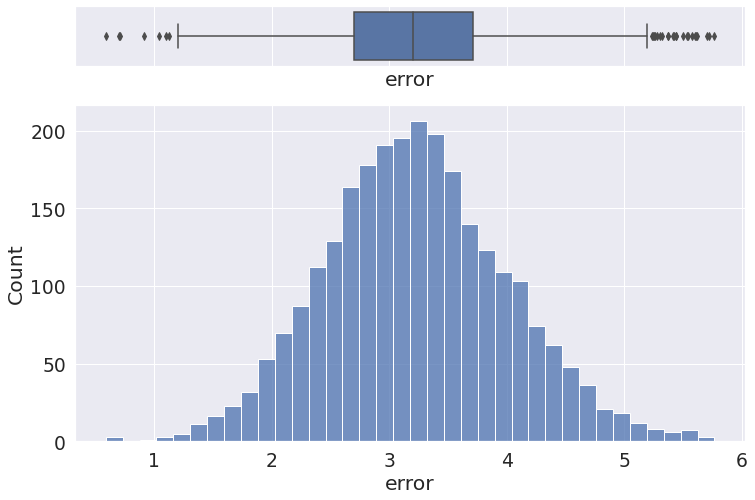

2621


In [33]:
rmse_gt_3(cnn, 'error', 'prediction')

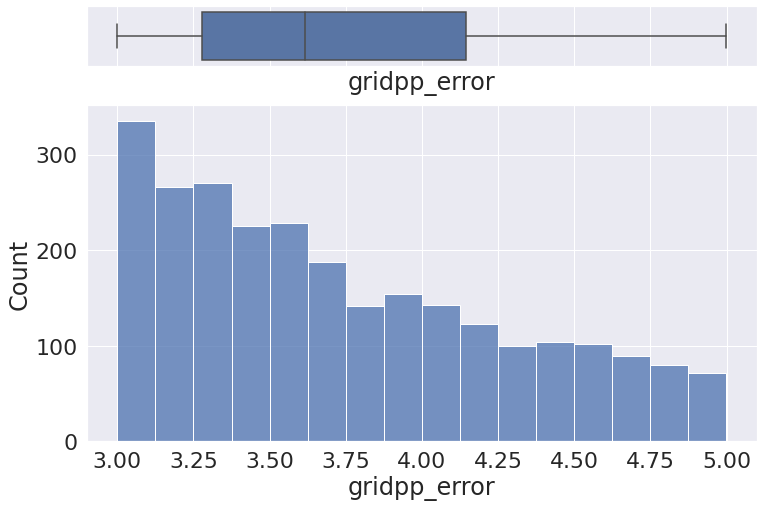

2621


In [24]:
rmse_gt_3_X(cnn, 'gridpp_error', 'gridpp')

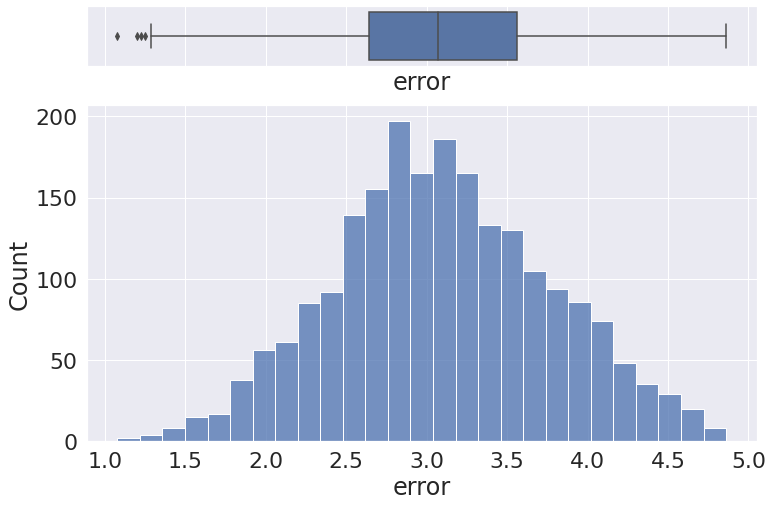

2147


In [25]:
rmse_gt_3_X(mlp, 'error', 'prediction')

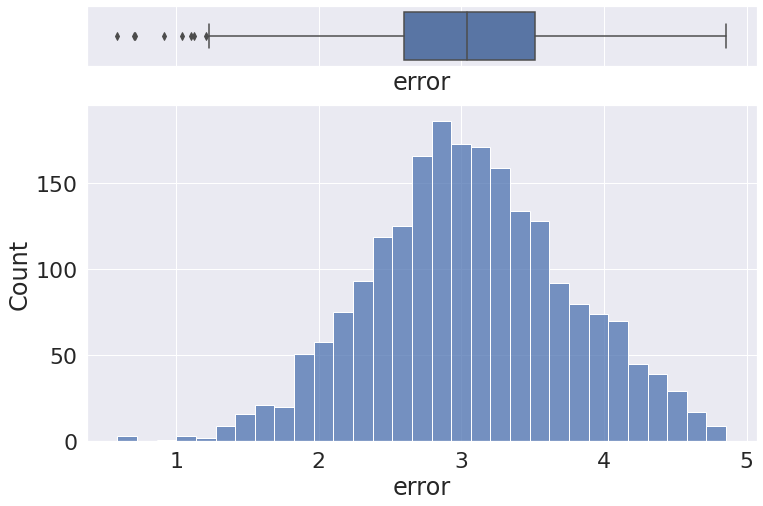

2168


In [26]:
rmse_gt_3_X(cnn, 'error', 'prediction')

In [42]:
2147/2621

0.819152995040061

In [23]:
2168/2621

0.8271652041205647

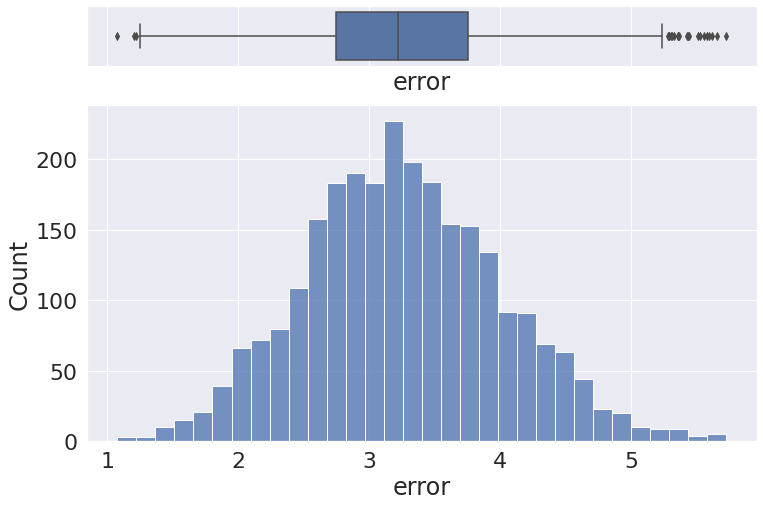

2621


In [27]:
rmse_gt_3(mlp, 'error', 'prediction')